# Connect Database

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Library

In [ ]:
# Author - Kaveesha Baddage

# Install spaCy and neuralcoref with correct versions 

# !pip install -U spacy==2.1.0 

!python -m spacy download en

# !pip uninstall -y neuralcoref 

# !pip install neuralcoref --no-binary neuralcoref

!pip install pattern
!pip install clean-text
!pip install optuna scikit-learn

2023-06-09 11:59:30.532167: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-09 11:59:31.657744: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-06-09 11:59:33.086310: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-09 11:59:33.086814: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

In [ ]:
# Import necessary libraries
import keras
import numpy as np
import pandas as pd
import nltk
import os
import nltk.corpus
# import spacy
# import neuralcoref

In [ ]:
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Load Data

In [ ]:
sanook = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_crime.txt', sep='|')
sanook

,title,content
0,The young man drove the rich on the highway.Li...,The young man lifted up the police station. 1 ...
1,Grandma led the grandchildren to report more.T...,"Grandmother, Primary 5, reported to the offens..."
2,8 -year -old girl raped by a neighborThe wife ...,8 -year -old girl raped by a neighbor The wife...
3,"Stepfather-real mother, attacking his 6-year-o...",The true stepfather-mother attacked the 6-year...
4,"Certainly drunk, Closed Circuit, capturing a g...","Closed circuit captures a minute, a taxi, a 76..."
...,...,...
952,"The old man is faint, 4 years old until the bl...",The police at Na Pho police station in Buriram...
953,The security guards followed the security guar...,"At 09.00 hrs. On 21 September, Pol.Col. Sathit..."
954,"6 wheels break!Crashed into the motorcycle, ex...",6 -wheel trucks In the middle of the intersect...
955,Broker hiring a 13 -year -old girl to work in ...,Broker hiring a 13 -year -old girl to work in ...


In [ ]:
thairath = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_crime_thairath_en.txt', sep='|')
thairath

,title,content
0,Maj. Gen. Wirachai Mercy shaved his head and m...,"Enter the parachute ""Maj. Gen. Wirachai Songme..."
1,"Rescuers find important evidence, axe-knife of...",The rescuer found the axe-knife of the middle....
2,"To issue the ""Police Sword Ching Thong"", order...","Chief Of Staff Sign the order for the ""Police ..."
3,Police sword Ching Thong confessed to the stre...,"Big Joke Pol. Gen. Surachet Hakpal, Deputy Chi..."
4,Drunkenness Stepson extinguished from mother-i...,"Dragging his neck to the smoke, a drunken youn..."
...,...,...
778,The police officer has been deceived by the ca...,The victim's representative cried. The police ...
779,No surprises. Prosecutor Star points to waterm...,Star Prosecutor points to the watermelon case....
780,"191 Attached to the rank of ""Police Dog"" to ""A...",Commander 191 was awarded the Police Dog Award...
781,"3 men selling marijuana, robbing tourists, cla...",3 young men selling marijuana on Khao San Road...


In [ ]:
df_raw_crime = pd.concat([sanook, thairath], join="inner", ignore_index=True)
df_raw_crime

,title,content
0,The young man drove the rich on the highway.Li...,The young man lifted up the police station. 1 ...
1,Grandma led the grandchildren to report more.T...,"Grandmother, Primary 5, reported to the offens..."
2,8 -year -old girl raped by a neighborThe wife ...,8 -year -old girl raped by a neighbor The wife...
3,"Stepfather-real mother, attacking his 6-year-o...",The true stepfather-mother attacked the 6-year...
4,"Certainly drunk, Closed Circuit, capturing a g...","Closed circuit captures a minute, a taxi, a 76..."
...,...,...
1735,The police officer has been deceived by the ca...,The victim's representative cried. The police ...
1736,No surprises. Prosecutor Star points to waterm...,Star Prosecutor points to the watermelon case....
1737,"191 Attached to the rank of ""Police Dog"" to ""A...",Commander 191 was awarded the Police Dog Award...
1738,"3 men selling marijuana, robbing tourists, cla...",3 young men selling marijuana on Khao San Road...


In [ ]:
sanook = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_sport.txt', sep='|')
sanook

,title,content
0,"Can play every day!Opening the warp ""Kim Mi-Ju...","Take to know Kim Mi-Ju, one of the famous Sout..."
1,"Big chest is the reason!""Minami Wiji"" from a f...","Regarded as another beautiful girl, raw fish t..."
2,Summary of the Premier League football match 2...,"The head of the Man City opened the house, won..."
3,"Clear angels ""Phen Pheng"", the most female mod...",Considered as another girl who likes to exerci...
4,"Come quickly!The most famous guru ""Ten Hak"" wa...",The famous Richard Key Guru revealed that the ...
...,...,...
921,"Not disappointed!Thailand smashed Taiwan 3-1, ...","October 7, 20:00 at 16:00 hrs. At Viet Tri Sta..."
922,Beyond resistance!Thai women volleyball defeat...,The 2022 World Women's Volleyball Championship...
923,The second half!Buriram United invaded Lamphun...,"Handrax Revo Thai League 2022/23, 8th Friday, ..."
924,"Eliminated but impressed!Foreign comments""Thai...",3 matches have passed for the Thai female rubb...


In [ ]:
thaipbs = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_sport_thaipbs_en.txt', sep='|', names=['title','content'], header=None)
thaipbs

,title,content
0,Intensely scored two days 4-under-par narrowly...,Today (15 Aug 2020) Reporter Report INTENSE LI...
1,"Thai League Co., Ltd. confirms the list of clu...","Thai League Co., Ltd. confirms the list of mem..."
2,Sisaket Take off the mitten to be a gardener ...,Reporter reports that Sisaket Nakhon Luang Pro...
3,"Thai Senior Swing Announces ""Toyota & Senior PGA""",Today (15 Aug 2020) Thai Senior Golf Associati...
4,Madame Pang is ready to support the Thai women...,Women's Professional Golf Association Movement...
...,...,...
563,Chaba Kaew beat Singapore 4-0 2023 SEA Games d...,Chaba Kaew beat Singapore 4-0 in the first rou...
564,Messi to move without renewing Paris Saint-Ger...,Lionel Messi will not renew his contract with ...
565,Supavadee - Kulsatri Yujitsu pair make their g...,"Thanks. Kaew Sa Saen - Kulsatri Khamsaroi, the..."
566,Tony Payne. fall over Broken ribs to miss mara...,Thai marathon runner Tony Payne may have to wi...


In [ ]:
df_raw_sport = pd.concat([sanook, thaipbs], join="inner", ignore_index=True)
df_raw_sport

,title,content
0,"Can play every day!Opening the warp ""Kim Mi-Ju...","Take to know Kim Mi-Ju, one of the famous Sout..."
1,"Big chest is the reason!""Minami Wiji"" from a f...","Regarded as another beautiful girl, raw fish t..."
2,Summary of the Premier League football match 2...,"The head of the Man City opened the house, won..."
3,"Clear angels ""Phen Pheng"", the most female mod...",Considered as another girl who likes to exerci...
4,"Come quickly!The most famous guru ""Ten Hak"" wa...",The famous Richard Key Guru revealed that the ...
...,...,...
1489,Chaba Kaew beat Singapore 4-0 2023 SEA Games d...,Chaba Kaew beat Singapore 4-0 in the first rou...
1490,Messi to move without renewing Paris Saint-Ger...,Lionel Messi will not renew his contract with ...
1491,Supavadee - Kulsatri Yujitsu pair make their g...,"Thanks. Kaew Sa Saen - Kulsatri Khamsaroi, the..."
1492,Tony Payne. fall over Broken ribs to miss mara...,Thai marathon runner Tony Payne may have to wi...


In [ ]:
sanook = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_politic_en.txt', sep='|')
sanook

,title,content
0,Thammasat warned ministers to be wary of falli...,"captain Thammasat Brahmaputra, Member of the H..."
1,Governor Chatchachart attended the ceremony to...,Chatchat-Pavena-Seetha attended the ceremony o...
2,Demonstration Minister Reiterate that there ar...,Mr. Sathit Patutecha Deputy Minister of Health...
3,The former MP is worried if Prayuth is out of ...,"Mr. Somchai Srisuttayakorn, Former Election Co..."
4,Doctor Ravi warns the government! The far-righ...,"Today (May 27), Dr. Ravi Maschamadol, a list M..."
...,...,...
703,U.N. representatives are concerned about the r...,"Glemont Wool, Special Reporter for the United ..."
704,"Lightning ""Inspector Shua"" left the civil serv...",Inspector Sue to leave the government service ...
705,"Bangkok reveals 8 electoral district formats, ...",Electoral Commission Bangkok Unveiled the form...
706,Pravit Dharmadhanas oversees the Northern Camp...,Gen. Pravit Wongsuwan The head of the Prachara...


In [ ]:
thaipbs = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_politics_thaipbs_en.txt', sep='|', names=['title','content'], header=None)
thaipbs

,title,content
0,Politics is bustling!,Many political parties have intensified their ...
1,"Nikorn Won, the government-opposition, did his...","Nikorn Won, the government-opposition to save ..."
2,Anucha Insist there is no lobby crash general ...,Anucha Confirming that there is no lobbying fo...
3,Chaithawat intercepts government MPs Don't pla...,Chaitawat Doug Government MPs don't play parli...
4,The NACC pointed out the cause of the offense....,NACC finds former deputy secretary of the SAT ...
...,...,...
855,"Election 2023: ""Prawit"" to campaign to help 3 ...",Gen. Prawit to campaign for final election Phu...
856,Election 2023 : Ram University is ready to hol...,SAT to check readiness Central polling locatio...
857,"Election 2023 : 7th Super Poll ""PT"" got 139 se...","The 7th Super Poll ""For Thai"" won 139 seats, ""..."
858,"Election 2556 : ""Settha"" reiterates ready to ...",Pae Thongtarn Video Call Stage for Thailand in...


In [ ]:
df_raw_politic = pd.concat([sanook, thaipbs], join="inner", ignore_index=True)
df_raw_politic

,title,content
0,Thammasat warned ministers to be wary of falli...,"captain Thammasat Brahmaputra, Member of the H..."
1,Governor Chatchachart attended the ceremony to...,Chatchat-Pavena-Seetha attended the ceremony o...
2,Demonstration Minister Reiterate that there ar...,Mr. Sathit Patutecha Deputy Minister of Health...
3,The former MP is worried if Prayuth is out of ...,"Mr. Somchai Srisuttayakorn, Former Election Co..."
4,Doctor Ravi warns the government! The far-righ...,"Today (May 27), Dr. Ravi Maschamadol, a list M..."
...,...,...
1563,"Election 2023: ""Prawit"" to campaign to help 3 ...",Gen. Prawit to campaign for final election Phu...
1564,Election 2023 : Ram University is ready to hol...,SAT to check readiness Central polling locatio...
1565,"Election 2023 : 7th Super Poll ""PT"" got 139 se...","The 7th Super Poll ""For Thai"" won 139 seats, ""..."
1566,"Election 2556 : ""Settha"" reiterates ready to ...",Pae Thongtarn Video Call Stage for Thailand in...


In [ ]:
thairath = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_tech_thairath_en.txt', sep='|')
thairath

,title,content
0,Apple confirms iCloud image scanning system on...,Apple is revealed in the FAQ or FAQ on Apple's...
1,Chinese authorities have filed a lawsuit again...,Chinese prosecutors indict Tencent Beijing pro...
2,Apple to launch child scanning system on iPhon...,Apple is preparing to launch a new feature to ...
3,Amazon users revealed that a salesperson sent ...,Amazon customers have revealed that they have ...
4,Huawei launches new digital power business to ...,Huawei confident in Thailand's digital potenti...
...,...,...
1195,Elon Musk had an attempt to take over OpenAI i...,"Elon Musk, one of the former co-founders of Op..."
1196,Twitter uses legal process Order the removal o...,"Twitter, a platform owned by Elon Musk, hopes ..."
1197,International media reports OPPO plans to with...,Oppo and OnePlus reportedly planned to end the...
1198,Microsoft launches Security Copilot using arti...,Microsoft continues to use artificial intellig...


In [ ]:
thaipbs = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_tech_thaipbs_en.txt', sep='|', names=['title','content'], header=None)
thaipbs

,title,content
0,Thai researchers discover mangosteen extract h...,Thai researchers discover mangosteen extract h...
1,5th Anniversary of Thai PBS Animation Contest ...,On the occasion of the 5th anniversary of Th...
2,"""No experience"" confirms ""NASA"" request to us...",Minister of Science and Technology Reaffirmin...
3,The Administrative Court scheduled an emergenc...,The Administrative Court scheduled an emergenc...
4,Suryasai prepares to submit to Administrative ...,Suryasai prepares to submit to Administrative ...
...,...,...
314,Online media warns against using social media ...,Online media warns against using social media ...
315,"""Thai Software"" advances through CMMI standar...","""Software Park"" pointed out that Thai softwar..."
316,MEA. Electricity consumption at the beginning ...,Metropolitan Electricity Authority reveals re...
317,Police arrest network of football betting site...,Police arrest network of football betting site...


In [ ]:
df_raw_tech = pd.concat([thairath, thaipbs], join="inner", ignore_index=True)
df_raw_tech

,title,content
0,Apple confirms iCloud image scanning system on...,Apple is revealed in the FAQ or FAQ on Apple's...
1,Chinese authorities have filed a lawsuit again...,Chinese prosecutors indict Tencent Beijing pro...
2,Apple to launch child scanning system on iPhon...,Apple is preparing to launch a new feature to ...
3,Amazon users revealed that a salesperson sent ...,Amazon customers have revealed that they have ...
4,Huawei launches new digital power business to ...,Huawei confident in Thailand's digital potenti...
...,...,...
1514,Online media warns against using social media ...,Online media warns against using social media ...
1515,"""Thai Software"" advances through CMMI standar...","""Software Park"" pointed out that Thai softwar..."
1516,MEA. Electricity consumption at the beginning ...,Metropolitan Electricity Authority reveals re...
1517,Police arrest network of football betting site...,Police arrest network of football betting site...


In [ ]:
thairath = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_business_thairath_en.txt', sep='|')
thairath

,title,content
0,"Isan BCG Expo 2022, a sustainable innovation e...","Isan BCG Expo 2022, the first sustainable inno..."
1,SEC and Digital Asset Governance Direction,"From the collapse of LUNA and TerraUSD (UST), ..."
2,"Gold price today, 10 December 2022, opened the...","Today's Gold Price On Saturday morning, Decemb..."
3,"Cinema and popcorn go hand in hand, but this y...",There's nothing as serious as COVID. Vicha Poo...
4,"Products nationwide are priced down, pigs and ...","Capt. Chakra Yodmanee Deputy Director-General,..."
...,...,...
1195,Trowel Deliver polls MPs to 9 political parties,Mr. Kriangkrai Thieranukul Chairman of the Fed...
1196,TAT joins hands with Tinder to invite singles ...,"Ms. Thapanee Kiatpaiboon, Deputy Governor for ..."
1197,Bangchak joins songkran oil price freeze,Mr. Somchai Tejavanich Chief Marketing Officer...
1198,Gold Price Gold Price Today 29 Mar 2023 Open W...,Gold Price Today Latest Open Wednesday morning...


In [ ]:
thaipbs = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_economic_thaipbs_en.txt', sep='|', names=['title','content'], header=None)
thaipbs

,title,content
0,"Unfold the timeline of the ""Red Line Extension...","Saksiam unveils timeline of ""Red Line Extensio..."
1,Thailand Pass will not be cancelled and new cr...,Assistant Spokesperson Insist on not canceling...
2,"The State Railway commissioned ""Ultraman"", a d...","The State Railway commissioned ""Ultraman"", Tha..."
3,Preparing for the opening of the country on May 1,Ministry of Transport prepares Suvarnabhumi Ai...
4,"Palm oil price jumps, shoe sucks selling 1 lit...",Palm planters Confirms retail price of palm oi...
...,...,...
200,"Accelerate the M81 motorway ""Bangyai-Kan"" to f...",Department of Highways reveals progress of M81...
201,Annuity 2 State Welfare Card Transfer in April...,The government announced the news of the 2nd a...
202,Transport cuts taxi driver's license points fo...,The Department of Transport tightens measures ...
203,Send it again Prime Minister asks the SAT to a...,"After the April 25 cabinet meeting, approved a..."


In [ ]:
df_raw_business = pd.concat([thairath, thaipbs], join="inner", ignore_index=True)
df_raw_business

,title,content
0,"Isan BCG Expo 2022, a sustainable innovation e...","Isan BCG Expo 2022, the first sustainable inno..."
1,SEC and Digital Asset Governance Direction,"From the collapse of LUNA and TerraUSD (UST), ..."
2,"Gold price today, 10 December 2022, opened the...","Today's Gold Price On Saturday morning, Decemb..."
3,"Cinema and popcorn go hand in hand, but this y...",There's nothing as serious as COVID. Vicha Poo...
4,"Products nationwide are priced down, pigs and ...","Capt. Chakra Yodmanee Deputy Director-General,..."
...,...,...
1400,"Accelerate the M81 motorway ""Bangyai-Kan"" to f...",Department of Highways reveals progress of M81...
1401,Annuity 2 State Welfare Card Transfer in April...,The government announced the news of the 2nd a...
1402,Transport cuts taxi driver's license points fo...,The Department of Transport tightens measures ...
1403,Send it again Prime Minister asks the SAT to a...,"After the April 25 cabinet meeting, approved a..."


In [ ]:
sanook = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_entertain_en.txt', sep='|')
sanook

,title,content
0,"GDH ""You and Me and Me"" will be released on Fe...",'GDH' Debut of the first romantic film of the ...
1,"Nugger gets hoops ""Good Thachai"" gets hit by t...",From the sweetest jin couple That many people ...
2,Ong Gewlin He revealed that he stopped working...,If you're going to mention the name of a famou...
3,Cherprang-Pupe-Namsai-before-6 years BNK48 fro...,Traveling as an artist for more than 6 years f...
4,Gina The Face reveals slimming formula after s...,"It's called standing one pretty puppet story, ..."
...,...,...
1186,Hai-Sen reveals that if he chooses to accept a...,"After 2 young Hai-Sen Paper Planes, the owner ..."
1187,Nonni Natcha sends music Like before advantage...,"The trend is too hot, overtaking all the trend..."
1188,Dongdong Kritsakorn Answered after being watch...,It is another couple who are being watched for...
1189,Open the latest photo Opal Panisara beautiful ...,"For Opal Panisara, the beautiful wife of Dr. O..."


In [ ]:
thaipbs = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_entertainment_thaipbs_en.txt', sep='|', names=['title','content'], header=None)
thaipbs

,title,content
0,Australian Capital Graffiti artists are allowe...,Canberra Australia's capital changes strategy ...
1,"The meaning of the ""rose"" and the connection o...",The best-selling flowers during Valentine's Da...
2,"Ratchaburi printmaker dreaded, no successor to...","For more than 50 years, the only typewriter of..."
3,"The ""Kids Play Games"" Way to the ""E-Sports Ath...",Changing attitudes for parents and Thai societ...
4,A new generation of architects design the use ...,"If you don't try it, you won't know how the em..."
...,...,...
318,Iran is the world's largest cosmetic surgery c...,Iran ranks No. 1 among the top 10 countries wo...
319,Nat-Aniporn Miss Universe Thailand 2015 and th...,"More than beauty, the influence of fashion has..."
320,"Sentai, a new trend of Japanese teachers-stude...","Teachers, students Students in Japan love fash..."
321,"Answer: The phenomenon of baby god dolls, righ...",The program responds to the question on 26 Jan...


In [ ]:
df_raw_ent = pd.concat([sanook, thaipbs], join="inner", ignore_index=True)
df_raw_ent

,title,content
0,"GDH ""You and Me and Me"" will be released on Fe...",'GDH' Debut of the first romantic film of the ...
1,"Nugger gets hoops ""Good Thachai"" gets hit by t...",From the sweetest jin couple That many people ...
2,Ong Gewlin He revealed that he stopped working...,If you're going to mention the name of a famou...
3,Cherprang-Pupe-Namsai-before-6 years BNK48 fro...,Traveling as an artist for more than 6 years f...
4,Gina The Face reveals slimming formula after s...,"It's called standing one pretty puppet story, ..."
...,...,...
1509,Iran is the world's largest cosmetic surgery c...,Iran ranks No. 1 among the top 10 countries wo...
1510,Nat-Aniporn Miss Universe Thailand 2015 and th...,"More than beauty, the influence of fashion has..."
1511,"Sentai, a new trend of Japanese teachers-stude...","Teachers, students Students in Japan love fash..."
1512,"Answer: The phenomenon of baby god dolls, righ...",The program responds to the question on 26 Jan...


In [ ]:
bbc = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/BBCNewsTrain.csv')
bbc

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [ ]:
bbc.rename(columns = {'Text' : 'content', 'Category' : 'tag'}, inplace = True)
bbc.dropna().reset_index(drop=True)
bbc

,ArticleId,content,tag
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [ ]:
df_raw_sport['tag'] = "sport"
df_raw_sport.head()

,title,content,tag
0,"Can play every day!Opening the warp ""Kim Mi-Ju...","Take to know Kim Mi-Ju, one of the famous Sout...",sport
1,"Big chest is the reason!""Minami Wiji"" from a f...","Regarded as another beautiful girl, raw fish t...",sport
2,Summary of the Premier League football match 2...,"The head of the Man City opened the house, won...",sport
3,"Clear angels ""Phen Pheng"", the most female mod...",Considered as another girl who likes to exerci...,sport
4,"Come quickly!The most famous guru ""Ten Hak"" wa...",The famous Richard Key Guru revealed that the ...,sport


In [ ]:
df_raw_crime['tag'] = "crime"
df_raw_crime.head()

,title,content,tag
0,The young man drove the rich on the highway.Li...,The young man lifted up the police station. 1 ...,crime
1,Grandma led the grandchildren to report more.T...,"Grandmother, Primary 5, reported to the offens...",crime
2,8 -year -old girl raped by a neighborThe wife ...,8 -year -old girl raped by a neighbor The wife...,crime
3,"Stepfather-real mother, attacking his 6-year-o...",The true stepfather-mother attacked the 6-year...,crime
4,"Certainly drunk, Closed Circuit, capturing a g...","Closed circuit captures a minute, a taxi, a 76...",crime


In [ ]:
df_raw_politic['tag'] = "politics"
df_raw_politic.head()

,title,content,tag
0,Thammasat warned ministers to be wary of falli...,"captain Thammasat Brahmaputra, Member of the H...",politics
1,Governor Chatchachart attended the ceremony to...,Chatchat-Pavena-Seetha attended the ceremony o...,politics
2,Demonstration Minister Reiterate that there ar...,Mr. Sathit Patutecha Deputy Minister of Health...,politics
3,The former MP is worried if Prayuth is out of ...,"Mr. Somchai Srisuttayakorn, Former Election Co...",politics
4,Doctor Ravi warns the government! The far-righ...,"Today (May 27), Dr. Ravi Maschamadol, a list M...",politics


In [ ]:
df_raw_business['tag'] = "business"
df_raw_business.head()

,title,content,tag
0,"Isan BCG Expo 2022, a sustainable innovation e...","Isan BCG Expo 2022, the first sustainable inno...",business
1,SEC and Digital Asset Governance Direction,"From the collapse of LUNA and TerraUSD (UST), ...",business
2,"Gold price today, 10 December 2022, opened the...","Today's Gold Price On Saturday morning, Decemb...",business
3,"Cinema and popcorn go hand in hand, but this y...",There's nothing as serious as COVID. Vicha Poo...,business
4,"Products nationwide are priced down, pigs and ...","Capt. Chakra Yodmanee Deputy Director-General,...",business


In [ ]:
df_raw_ent['tag'] = "entertainment"
df_raw_ent.head()

,title,content,tag
0,"GDH ""You and Me and Me"" will be released on Fe...",'GDH' Debut of the first romantic film of the ...,entertainment
1,"Nugger gets hoops ""Good Thachai"" gets hit by t...",From the sweetest jin couple That many people ...,entertainment
2,Ong Gewlin He revealed that he stopped working...,If you're going to mention the name of a famou...,entertainment
3,Cherprang-Pupe-Namsai-before-6 years BNK48 fro...,Traveling as an artist for more than 6 years f...,entertainment
4,Gina The Face reveals slimming formula after s...,"It's called standing one pretty puppet story, ...",entertainment


In [ ]:
df_raw_tech['tag'] = "tech"
df_raw_tech.head()

,title,content,tag
0,Apple confirms iCloud image scanning system on...,Apple is revealed in the FAQ or FAQ on Apple's...,tech
1,Chinese authorities have filed a lawsuit again...,Chinese prosecutors indict Tencent Beijing pro...,tech
2,Apple to launch child scanning system on iPhon...,Apple is preparing to launch a new feature to ...,tech
3,Amazon users revealed that a salesperson sent ...,Amazon customers have revealed that they have ...,tech
4,Huawei launches new digital power business to ...,Huawei confident in Thailand's digital potenti...,tech


In [ ]:
df_raw = pd.concat([df_raw_crime, df_raw_sport, df_raw_politic, df_raw_tech, df_raw_ent, df_raw_business], join="inner", ignore_index=True)

In [ ]:
df_raw

,title,content,tag
0,The young man drove the rich on the highway.Li...,The young man lifted up the police station. 1 ...,crime
1,Grandma led the grandchildren to report more.T...,"Grandmother, Primary 5, reported to the offens...",crime
2,8 -year -old girl raped by a neighborThe wife ...,8 -year -old girl raped by a neighbor The wife...,crime
3,"Stepfather-real mother, attacking his 6-year-o...",The true stepfather-mother attacked the 6-year...,crime
4,"Certainly drunk, Closed Circuit, capturing a g...","Closed circuit captures a minute, a taxi, a 76...",crime
...,...,...,...
9235,"Accelerate the M81 motorway ""Bangyai-Kan"" to f...",Department of Highways reveals progress of M81...,business
9236,Annuity 2 State Welfare Card Transfer in April...,The government announced the news of the 2nd a...,business
9237,Transport cuts taxi driver's license points fo...,The Department of Transport tightens measures ...,business
9238,Send it again Prime Minister asks the SAT to a...,"After the April 25 cabinet meeting, approved a...",business


In [ ]:
df_raw = df_raw.dropna().reset_index(drop=True)
df_raw['content'] = df_raw['title'] + ' ' + df_raw['content']
df_raw.drop('title',axis=1,inplace=True)
df_raw

,content,tag
0,The young man drove the rich on the highway.Li...,crime
1,Grandma led the grandchildren to report more.T...,crime
2,8 -year -old girl raped by a neighborThe wife ...,crime
3,"Stepfather-real mother, attacking his 6-year-o...",crime
4,"Certainly drunk, Closed Circuit, capturing a g...",crime
...,...,...
9163,"Accelerate the M81 motorway ""Bangyai-Kan"" to f...",business
9164,Annuity 2 State Welfare Card Transfer in April...,business
9165,Transport cuts taxi driver's license points fo...,business
9166,Send it again Prime Minister asks the SAT to a...,business


In [ ]:
df = pd.concat([bbc[['content', 'tag']], df_raw], join="inner", ignore_index=True)
df = df.dropna().reset_index(drop=True)
df

,content,tag
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business
...,...,...
10653,"Accelerate the M81 motorway ""Bangyai-Kan"" to f...",business
10654,Annuity 2 State Welfare Card Transfer in April...,business
10655,Transport cuts taxi driver's license points fo...,business
10656,Send it again Prime Minister asks the SAT to a...,business


In [ ]:
df["tag"].value_counts()

politics         1819
sport            1819
entertainment    1773
tech             1771
crime            1740
business         1736
Name: tag, dtype: int64

In [ ]:
df_crime = df[df['tag'] == "crime"][:1500]
df_sport = df[df['tag'] == "sport"][:1500]
df_politics = df[df['tag'] == "politics"][:1500]
df_business = df[df['tag'] == "business"][:1500]
df_tech = df[df['tag'] == "tech"][:1500]
df_entertainment = df[df['tag'] == "entertainment"][:1500]

df = pd.concat([df_crime, df_sport, df_politics, df_business, df_tech, df_entertainment], join="inner", ignore_index=True)
df = df.dropna().reset_index(drop=True)
df

,content,tag
0,The young man drove the rich on the highway.Li...,crime
1,Grandma led the grandchildren to report more.T...,crime
2,8 -year -old girl raped by a neighborThe wife ...,crime
3,"Stepfather-real mother, attacking his 6-year-o...",crime
4,"Certainly drunk, Closed Circuit, capturing a g...",crime
...,...,...
8995,Miss Teen USA stage announces no swimsuits. Ch...,entertainment
8996,Hip hairstyles Salon Street 100 Baht! Because ...,entertainment
8997,South Korean research center hires beloved pet...,entertainment
8998,"How to view news pages and websites, which one...",entertainment


In [ ]:
df["tag"].value_counts()

crime            1500
sport            1500
politics         1500
business         1500
tech             1500
entertainment    1500
Name: tag, dtype: int64

# Text Preprocessing

## Clean Data

In [ ]:
import re
from cleantext import clean

def clean_data(text):
  text = text.lower()
  text = clean(text, no_emoji = True, no_line_breaks = True)
  text = re.sub('[^\w\s]+', '', text)
  text = re.sub('\d+', ' ', text)
  text = re.sub('\s+', ' ', text)
  return text.strip()

## Normalization (Lemmatization)

In [ ]:
import pattern
from pattern.en import lemma, lexeme

In [ ]:
def lemmatize_word(list_word):
  return [lemma(w) for w in list_word]

## Stop word removal

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [ ]:
def remove_stopword(tokens):
  token = [w for w in tokens if not w in stop_words]
  return token

## Final Preprocessing

In [ ]:
def preprocessing(text):
  # clean data
  text = clean_data(text)
  # tokenize 
  token = nltk.word_tokenize(text)
  # remove stop words from tokens
  stop_token = remove_stopword(token)
  # lemmatise tokens
  lemma_word = lemmatize_word(stop_token)
  text = ' '.join(word for word in lemma_word)
  return text

In [ ]:
df['clean'] = df['content'].apply(preprocessing)
df.head()

,content,tag,clean
0,The young man drove the rich on the highway.Li...,crime,young man drive rich highwaylift police statio...
1,Grandma led the grandchildren to report more.T...,crime,grandma lead grandchildren report morethe monk...
2,8 -year -old girl raped by a neighborThe wife ...,crime,year old girl rape neighborthe wife slanderthe...
3,"Stepfather-real mother, attacking his 6-year-o...",crime,stepfatherreal mother attack yearold son break...
4,"Certainly drunk, Closed Circuit, capturing a g...",crime,certainly drink close circuit capture ghost ta...


In [ ]:
df['tag_id'] = df['tag'].factorize()[0]
#View first 10 entries of category_id, as a sanity check
df['tag_id'][0:10]
df.tail(20)

,content,tag,clean,tag_id
8980,Transgender girl advertising model helps sari ...,entertainment,transgender girl advertise model help sari ind...,5
8981,"Eight Stripes, the city of the river of life ...",entertainment,eight stripe city river life catchphrase chach...,5
8982,Bangkok Handmade Transport deciphers transport...,entertainment,bangkok handmade transport decipher transporta...,5
8983,School for Designers to Pursue a Career Path ...,entertainment,school designer pursue career path another dre...,5
8984,Om Cocktail as a plastic model collector Om C...,entertainment,om cocktail plastic model collector om cocktai...,5
8985,Beautiful but risky with 4 fashion threats to ...,entertainment,beautiful risky fashion threat health high hee...,5
8986,"Rare Thai dessert ""Rice poop"" of Dee Ban Pong,...",entertainment,rare thai dessert rice poop dee ban pong ratch...,5
8987,"Halbrad, the new invention of bicycle lovers I...",entertainment,halbrad new invention bicycle lover inventor g...,5
8988,"Know ""valiant"" Dhammanita"" from a canal boy to...",entertainment,know valiant dhammanita canal boy spokesperson...,5
8989,The heart is music. Age is not an obstacle of ...,entertainment,heart music age obstacle malinda herman malind...,5


In [ ]:
tag_id_df = df[['tag', 'tag_id']].drop_duplicates().sort_values('tag_id')
tag_id_df

,tag,tag_id
0,crime,0
1500,sport,1
3000,politics,2
4500,business,3
6000,tech,4
7500,entertainment,5


In [ ]:
tag_to_id = dict(tag_id_df.values)
id_to_tag = dict(tag_id_df[['tag_id', 'tag']].values)
id_to_tag

{0: 'crime',
 1: 'sport',
 2: 'politics',
 3: 'business',
 4: 'tech',
 5: 'entertainment'}

In [ ]:
tag_to_id

{'crime': 0,
 'sport': 1,
 'politics': 2,
 'business': 3,
 'tech': 4,
 'entertainment': 5}

In [ ]:
df["token"] = df["clean"].apply(lambda x: x.split(' '))
df.head()

,content,tag,clean,tag_id,token
0,The young man drove the rich on the highway.Li...,crime,young man drive rich highwaylift police statio...,0,"[young, man, drive, rich, highwaylift, police,..."
1,Grandma led the grandchildren to report more.T...,crime,grandma lead grandchildren report morethe monk...,0,"[grandma, lead, grandchildren, report, morethe..."
2,8 -year -old girl raped by a neighborThe wife ...,crime,year old girl rape neighborthe wife slanderthe...,0,"[year, old, girl, rape, neighborthe, wife, sla..."
3,"Stepfather-real mother, attacking his 6-year-o...",crime,stepfatherreal mother attack yearold son break...,0,"[stepfatherreal, mother, attack, yearold, son,..."
4,"Certainly drunk, Closed Circuit, capturing a g...",crime,certainly drink close circuit capture ghost ta...,0,"[certainly, drink, close, circuit, capture, gh..."


In [ ]:
all_token = tokens = df['token'].explode().values
all_token

array(['young', 'man', 'drive', ..., 'time', 'blue', 'light'],
      dtype=object)

In [ ]:
unique_word = len(set(all_token))
unique_word

56011

# TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf  = TfidfVectorizer(
  stop_words = 'english',                      # ป้อนรายการคำ Stop words 
  ngram_range = (1,2),                         # อยากวิเคราะห์แบบ 2 คำ ติดกัน
  min_df = 5,                                  # ขั้นต่ำของ Doc Freq ของ Term
  max_df = 0.95,
  # max_features = 10000,
  max_features = int(unique_word*0.5),
  norm='l2'
)
# int(df.shape[0] * 0.001)

In [ ]:
tfidvec_train = tfidf.fit_transform(df['clean'])

In [ ]:
features = tfidvec_train.toarray()
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
labels = df.tag_id

In [ ]:
from sklearn.feature_selection import chi2
N = 3  # We are going to look for top 3 categories

#For each category, find words that are highly corelated to it
for tag, tag_id in sorted(tag_to_id.items()):
  features_chi2 = chi2(features, labels == tag_id)                        # Do chi2 analyses of all items in this category
  indices = np.argsort(features_chi2[0])                                  # Sorts the indices of features_chi2[0] - the chi-squared stats of each feature
  feature_names = np.array(tfidf.get_feature_names_out())[indices]            # Converts indices to feature names ( in increasing order of chi-squared stat values)
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]         # List of single word features ( in increasing order of chi-squared stat values)
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]          # List for two-word features ( in increasing order of chi-squared stat values)
  print("# '{}':".format(tag))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:]))) # Print 3 unigrams with highest Chi squared stat
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:]))) # Print 3 bigrams with highest Chi squared stat

# 'business':
  . Most correlated unigrams:
       . index
       . stock
       . baht
  . Most correlated bigrams:
       . million baht
       . company limit
       . public company
# 'crime':
  . Most correlated unigrams:
       . station
       . incident
       . police
  . Most correlated bigrams:
       . year old
       . police officer
       . police station
# 'entertainment':
  . Most correlated unigrams:
       . film
       . im
       . love
  . Most correlated bigrams:
       . feel like
       . post picture
       . entertainment industry
# 'politics':
  . Most correlated unigrams:
       . prime
       . minister
       . party
  . Most correlated bigrams:
       . gen prayuth
       . thai party
       . prime minister
# 'sport':
  . Most correlated unigrams:
       . game
       . league
       . team
  . Most correlated bigrams:
       . premier league
       . manchester unite
       . national team
# 'tech':
  . Most correlated unigrams:
       . iphone
       

In [ ]:
from sklearn.manifold import TSNE

# Sampling a subset of our dataset because t-SNE is computationally expensive
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)          # Randomly select 30 % of samples
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices]) # Array of all projected features of 30% of Randomly chosen samples 
projected_features.shape

(2700, 2)

In [ ]:
my_id = 0 # Select a tag_id
projected_features[(labels[indices] == my_id).values]

array([[ 30.814112 ,  50.73528  ],
       [ 17.834908 ,  31.397997 ],
       [ 11.804118 ,  26.708664 ],
       [ 25.85608  ,  26.013325 ],
       [ 26.585619 ,  27.110163 ],
       [ 15.546777 ,  25.586023 ],
       [ 23.595762 ,  33.01759  ],
       [ 45.17831  ,  25.580154 ],
       [ 24.224867 ,  32.77884  ],
       [ 25.568138 ,  42.83011  ],
       [ 28.584167 ,  42.624077 ],
       [ 21.777153 ,  39.01451  ],
       [ 12.043989 ,  21.093657 ],
       [ 29.056322 ,  47.438377 ],
       [ 31.529377 ,  51.486626 ],
       [ 22.238676 ,  34.178238 ],
       [ 18.65655  ,  28.124958 ],
       [ 26.781717 ,  31.537218 ],
       [ 18.986053 ,  43.59758  ],
       [ 10.794636 ,  40.709538 ],
       [ 25.117464 ,  44.182674 ],
       [ 26.230482 ,  47.41109  ],
       [ 21.80604  ,  42.50441  ],
       [ 14.746449 ,  16.292345 ],
       [ 29.752583 ,  39.87722  ],
       [ 35.764843 ,  25.619322 ],
       [ 11.91677  ,  19.684216 ],
       [ 19.780716 ,   5.992492 ],
       [ 31.976208 ,

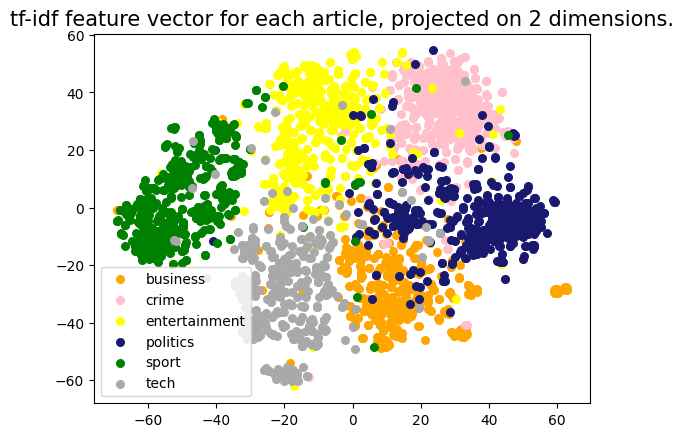

In [ ]:
import matplotlib.pyplot as plt

colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey', 'yellow']

# Find points belonging to each category and plot them
for tag,tag_id in sorted(tag_to_id.items()):
    points = projected_features[(labels[indices] == tag_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[tag_id], label=tag)
plt.title("tf-idf feature vector for each article, projected on 2 dimensions.",
          fontdict=dict(fontsize=15))
plt.legend()

# Prepare Train & Test Dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df['clean']
y = df['tag']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=df['tag'])

In [ ]:
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import optuna
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 500, step=50)
    max_depth = trial.suggest_int('max_depth', 3, 200)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                   min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
print('Best trial:', study.best_trial.params)
print('Best MSE:', study.best_value)
print('Best hyperparameters:', study.best_params)

[I 2023-06-09 12:02:45,907] A new study created in memory with name: no-name-bca14742-42b7-472e-97d6-3d6b33e54737
[I 2023-06-09 12:02:58,871] Trial 0 finished with value: 0.9261111111111111 and parameters: {'n_estimators': 500, 'max_depth': 114, 'min_samples_split': 6, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.9261111111111111.
[I 2023-06-09 12:03:22,890] Trial 1 finished with value: 0.9422222222222222 and parameters: {'n_estimators': 400, 'max_depth': 180, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.9422222222222222.
[I 2023-06-09 12:03:33,979] Trial 2 finished with value: 0.9294444444444444 and parameters: {'n_estimators': 450, 'max_depth': 162, 'min_samples_split': 3, 'min_samples_leaf': 9}. Best is trial 1 with value: 0.9422222222222222.
[I 2023-06-09 12:03:48,066] Trial 3 finished with value: 0.9333333333333333 and parameters: {'n_estimators': 450, 'max_depth': 28, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 1 with va

Best trial: {'n_estimators': 450, 'max_depth': 189, 'min_samples_split': 3, 'min_samples_leaf': 1}
Best MSE: 0.9438888888888889
Best hyperparameters: {'n_estimators': 450, 'max_depth': 189, 'min_samples_split': 3, 'min_samples_leaf': 1}


In [ ]:
study.best_params

{'n_estimators': 450,
 'max_depth': 189,
 'min_samples_split': 3,
 'min_samples_leaf': 1}

In [ ]:
best_params = study.best_params
rf = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'],
                                   min_samples_split=best_params['min_samples_split'], min_samples_leaf=best_params['min_samples_leaf'], random_state=101)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9438888888888889
               precision    recall  f1-score   support

     business       0.91      0.94      0.92       300
        crime       0.93      0.98      0.95       300
entertainment       0.95      0.97      0.96       300
     politics       0.96      0.89      0.92       300
        sport       0.97      0.97      0.97       300
         tech       0.95      0.92      0.94       300

     accuracy                           0.94      1800
    macro avg       0.94      0.94      0.94      1800
 weighted avg       0.94      0.94      0.94      1800



In [ ]:
pd.crosstab(y_test, y_pred)

col_0,business,crime,entertainment,politics,sport,tech
tag,,,,,,
business,282,2,0,7,0,9
crime,2,293,3,2,0,0
entertainment,2,6,290,0,2,0
politics,13,13,3,267,0,4
sport,2,0,6,1,290,1
tech,10,2,3,1,7,277


In [ ]:
import joblib
joblib.dump(rf, "/content/drive/MyDrive/AI_Tagging/model/random_forest_eng_downsampling.joblib")

['/content/drive/MyDrive/AI_Tagging/model/random_forest_eng_downsampling.joblib']

# Test

In [ ]:
text = "Can play every day!Opening the warp 'Kim Mi-Ju', the model of Kimchi Dum, who is fascinated with golf (picture) Take to know Kim Mi-Ju, one of the famous South Korean social media Which can say that the boys When you see it, it is necessary for this beautiful beautiful woman. There are more than 8.37 thousand Instagram Danlyun's Instagram followers. And is considered a woman who loves health very much-Ju Like playing golf life Which she often comes out with a gang of friends Almost every day As for other exercise activities that she is favorite is Playing server, Pilates, including traveling to various places, with-Ju himself said that she is lonely. Can't stay still Must always find something to do That became an unknown advantage. Because this is a secret that makes her in a good mood And also helps the fitness shape to pull the boys As you can see"

In [ ]:
ent = "software watching while you work software that can not only monitor every keystroke and action performed at a pc but also be used as legally binding evidence of wrong-doing has been unveiled.  worries about cyber-crime and sabotage have prompted many employers to consider monitoring employees. the developers behind the system claim it is a break-through in the way data is monitored and stored. but privacy advocates are concerned by the invasive nature of such software.  the system is a joint venture between security firm 3ami and storage specialists bridgehead software. they have joined forces to create a system which can monitor computer activity  store it and retrieve disputed files within minutes. more and more firms are finding themselves in deep water as a result of data misuse. sabotage and data theft are most commonly committed from within an organisation according to the national hi-tech crime unit (nhtcu) a survey conducted on its behalf by nop found evidence that more than 80% of medium and large companies have been victims of some form of cyber-crime. bridgehead software has come up with techniques to prove  to a legal standard  that any stored file on a pc has not been tampered with. ironically the impetus for developing the system came as a result of the freedom of information act  which requires companies to store all data for a certain amount of time.  the storage system has been incorporated into an application developed by security firm 3ami which allows every action on a computer to be logged. potentially it could help employers to follow the trail of stolen files and pinpoint whether they had been emailed to a third party  copied  printed  deleted or saved to cd  floppy disk  memory stick or flash card. other activities the system can monitor include the downloading of pornography  the use of racist or bullying language or the copying of applications for personal use. increasingly organisations that handle sensitive data  such as governments  are using biometric log-ins such as fingerprinting to provide conclusive proof of who was using a particular machine at any given time. privacy advocates are concerned that monitoring at work is not only damaging to employee s privacy but also to the relationship between employers and their staff.  that is not the case   said tim ellsmore  managing director of 3ami.  it is not about replacing dialogue but there are issues that you can talk through but you still need proof   he said.  people need to recognise that you are using a pc as a representative of a company and that employers have a legal requirement to store data   he added."

In [ ]:
x = tfidf.transform([preprocessing(ent)])

In [ ]:
rf.predict(x)

array(['tech'], dtype=object)